<h1> Objective:- Assessment Task 2.1P: Image filtering and edge detection </h1>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>
<div style="text-align: right"> StudentId: <b> 2210470832 </b></div>

### 1. Image filtering with OpenCV

True

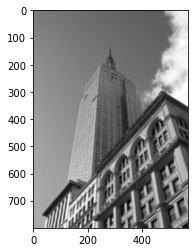

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

avg_kernel = np.ones((5,5), np.float32) / 25 #kernel K defined above
avg_result = cv.filter2D(img_gray, -1, avg_kernel) #always set the second parameter to -1
plt.imshow(avg_result, 'gray')
cv.imwrite('img_avg.png', avg_result) #writing the result image

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


True

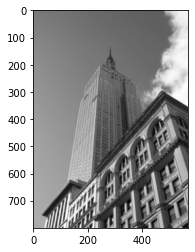

In [2]:
#gaussian Kernel
gaussian_kernel = np.ones((5,5), np.float32) #kernel K defined above
gaussian_kernel[0][1] = gaussian_kernel[0][3] = gaussian_kernel[1][0] = gaussian_kernel[1][4] = 4
gaussian_kernel[3][0] = gaussian_kernel[3][4] = gaussian_kernel[4][1] = gaussian_kernel[4][3] = 4

gaussian_kernel[0][2] = gaussian_kernel[2][0] = gaussian_kernel[2][4] = gaussian_kernel[4][2] = 6
gaussian_kernel[1][1] = gaussian_kernel[1][3] = gaussian_kernel[3][1] = gaussian_kernel[3][3] = 16

gaussian_kernel[1][2] = gaussian_kernel[2][1] = gaussian_kernel[2][3] = gaussian_kernel[3][2] = 24
gaussian_kernel[2][2] = 36

gaussian_kernel = gaussian_kernel/256
print(gaussian_kernel)

gaussian_result = cv.filter2D(img_gray, -1, gaussian_kernel) #always set the second parameter to -1
plt.imshow(gaussian_result, 'gray')
cv.imwrite('img_gaussian.png', gaussian_result) #writing the result image

[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]


True

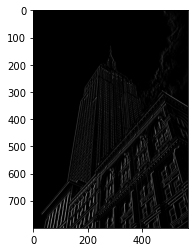

In [3]:
#sobel Kernel
sobel_kernel = np.ones((3,3), np.float32) #kernel K defined above
sobel_kernel[0][1] = sobel_kernel[1][1] = sobel_kernel[2][1] = 0
sobel_kernel[0][0] = sobel_kernel[2][0] = -1
sobel_kernel[1][0] = -2
sobel_kernel[1][2] = 2
sobel_kernel = sobel_kernel/8
print(sobel_kernel)

sobel_result = cv.filter2D(img_gray, -1, sobel_kernel) #always set the second parameter to -1
plt.imshow(sobel_result, 'gray')
cv.imwrite('img_sobel.png', sobel_result) #writing the result image

[[ 0.25 -0.5   0.25]
 [-0.5   1.   -0.5 ]
 [ 0.25 -0.5   0.25]]


True

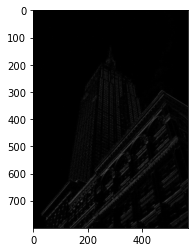

In [4]:
#Corner Kernel
corner_kernel = np.ones((3,3), np.float32) #kernel K defined above
corner_kernel[0][1] = corner_kernel[1][0] = corner_kernel[1][2] = corner_kernel[2][1] = -2
corner_kernel[1][1] = 4
corner_kernel = corner_kernel/4
print(corner_kernel)

corner_result = cv.filter2D(img_gray, -1, corner_kernel) #always set the second parameter to -1
plt.imshow(corner_result, 'gray')
cv.imwrite('img_corner.png', corner_result) #writing the result image

True

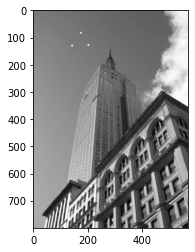

In [5]:
#Testing median filter
img_noise = cv.imread('empire_shotnoise.jpg')
img_noise_gray = cv.cvtColor(img_noise, cv.COLOR_BGR2GRAY)
ksize = 5 # neighbourhood of ksize x ksize; ksize must be an odd number
med_result = cv.medianBlur(img_noise_gray, ksize)
plt.imshow(med_result, 'gray')
cv.imwrite('img_noise_gray_median.png', med_result) #writing the result image

True

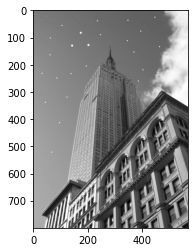

In [6]:
#Testing bilateral filter
rad = 5 #radius to determine neighbourhood
sigma_s = 10 #standard deviation for spatial distance (see slide 21 in week 2 lecture slides)
sigma_c = 30 #standard deviation for colour difference (see slide 21 in week 2 lecture slides)
bil_result = cv.bilateralFilter(img_noise_gray, rad, sigma_c, sigma_s)
plt.imshow(bil_result, 'gray')
cv.imwrite('img_noise_gray_bilateral.png', bil_result) #writing the result image

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


True

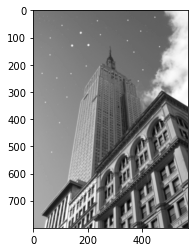

In [7]:
#gaussian Kernel
gaussian_kernel = np.ones((5,5), np.float32) #kernel K defined above
gaussian_kernel[0][1] = gaussian_kernel[0][3] = gaussian_kernel[1][0] = gaussian_kernel[1][4] = 4
gaussian_kernel[3][0] = gaussian_kernel[3][4] = gaussian_kernel[4][1] = gaussian_kernel[4][3] = 4

gaussian_kernel[0][2] = gaussian_kernel[2][0] = gaussian_kernel[2][4] = gaussian_kernel[4][2] = 6
gaussian_kernel[1][1] = gaussian_kernel[1][3] = gaussian_kernel[3][1] = gaussian_kernel[3][3] = 16

gaussian_kernel[1][2] = gaussian_kernel[2][1] = gaussian_kernel[2][3] = gaussian_kernel[3][2] = 24
gaussian_kernel[2][2] = 36

gaussian_kernel = gaussian_kernel/256
print(gaussian_kernel)

gaussian_result = cv.filter2D(img_noise_gray, -1, gaussian_kernel) #always set the second parameter to -1
plt.imshow(gaussian_result, 'gray')
cv.imwrite('img_noise_gray_gaussian.png', gaussian_result) #writing the result image

In [8]:
img_comparison = np.hstack((med_result, gaussian_result)) #stacking images side-by-side
cv.imwrite('img_comparison-median_gaussian.png', img_comparison) #writing the stacked image to file

img_comparison = np.hstack((bil_result, gaussian_result)) #stacking images side-by-side
cv.imwrite('img_comparison-bilateral_gaussian.png', img_comparison) #writing the stacked image to file

True

### 2. Edge detection

#### 2.1 Edge detection using Sobel kernels

True

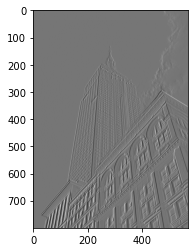

In [9]:
D_x = np.float32([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
der_x = cv.filter2D(img_gray, cv.CV_32F, D_x) #the 2nd parameter of filter2D is set to CV_32F to store negative values
plt.imshow(der_x, 'gray')
cv.imwrite('horizontal_derivative.png', der_x) #writing the horizontal derivative image to file

True

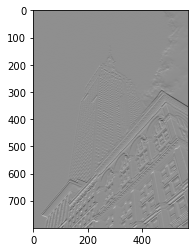

In [10]:
D_y = np.float32([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 8
der_y = cv.filter2D(img_gray, cv.CV_32F, D_y) #the 2nd parameter of filter2D is set to CV_32F to store negative values
plt.imshow(der_y, 'gray')
cv.imwrite('vertical_derivative.png', der_y) #writing the stacked image to file

True

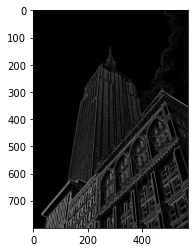

In [11]:
import math
height, width = img_gray.shape
mag_img_gray = np.zeros((height, width), np.float32) #gradient magnitude of img_gray
for i in range(0, height):
    for j in range(0, width):
        square_der_x = float(der_x[i, j]) * float(der_x[i, j])
        square_der_y = float(der_y[i, j]) * float(der_y[i, j])
        mag_img_gray[i, j] = int(math.sqrt(square_der_x + square_der_y))
plt.imshow(mag_img_gray,'gray')
cv.imwrite('gradient_magnitude.png', mag_img_gray) #writing the vertical derivative image to file

#### 2.2. Edge detection with Canny edge detector

True

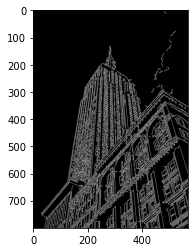

In [12]:
minVal = 100 #minVal used in hysteresis thresholding
maxVal = 200 #maxVal used in hysteresis thresholding
Canny_edges = cv.Canny(img_gray, minVal, maxVal)
plt.imshow(Canny_edges, 'gray')
cv.imwrite('canny_edge_detector.png', Canny_edges) #writing the stacked image to file

In [13]:
img_comparison = np.hstack((der_x, Canny_edges)) #stacking images side-by-side
cv.imwrite('img_comparison-derx_canny.png', img_comparison) #writing the stacked image to file

img_comparison = np.hstack((der_y, Canny_edges)) #stacking images side-by-side
cv.imwrite('img_comparison-dery_canny.png', img_comparison) #writing the stacked image to file

True